In [1]:
%matplotlib inline

import numpy as np
import torch
from torch import Tensor
from torch.autograd import Variable
import torch.optim as opt

import matplotlib.pyplot as plt

In [22]:
x_data = np.linspace(1,10,20)
y_data = 3*x_data + 2 + np.random.randn(20)
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [74]:
x = Variable(Tensor(x_data))
y = Variable(Tensor(y_data))
w = Variable(torch.randn(1,1),requires_grad=True)
b = Variable(torch.zeros(1),requires_grad=True)
optimizer = opt.Adam([w,b],lr=0.05)

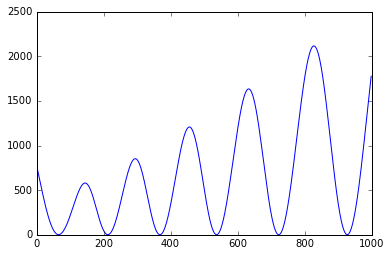

In [75]:
costs = []
for i in range(1000):
    out = x.mm(w)
    out += b.unsqueeze(0).expand_as(out)
    cost = (out - y).pow(2).mean()
    cost.backward()
    optimizer.step()
    costs.append(cost.data.numpy()[0])
    
plt.plot(costs)
